# Objective
- Data understanding
- Data preparation(cleanning data)
- Data Exploration
- Data Preprocessing for Model
- Data Modeling
- Model Tunning
- Evaluation
- Result

# Data understanding

## Import & Install every single packages

---

In [1]:
from kaggle_secrets import UserSecretsClient
user_secrets = UserSecretsClient()
user_credential = user_secrets.get_gcloud_credential()
user_secrets.set_tensorflow_credential(user_credential)

In [2]:
import numpy as np
import pandas as pd
import random as rnd
# computing libraries

import seaborn as sns
import matplotlib.pyplot as plt
#ploting graph libraries

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

# Splitting
from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split, GridSearchCV

In [3]:
!pip install --upgrade seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 2.0 MB/s eta 0:00:00a 0:00:01m
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.12.2
    Uninstalling seaborn-0.12.2:
      Successfully uninstalled seaborn-0.12.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ydata-profiling 4.6.4 requires seaborn<0.13,>=0.10.1, but you have seaborn 0.13.2 which is incompatible.


In [4]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/laptops-price-dataset/laptops.csv


## Data reading && exploration

---

In [5]:
df_laptop = pd.read_csv("/kaggle/input/laptops-price-dataset/laptops.csv")

In [6]:
df_laptop

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01
...,...,...,...,...,...,...,...,...,...,...,...,...
2155,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...,Refurbished,Razer,Blade,Intel Core i7,16,1000,SSD,RTX 3060,17.3,No,2699.99
2156,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...,Refurbished,Razer,Blade,Intel Core i7,16,1000,SSD,RTX 3070,17.3,No,2899.99
2157,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...,Refurbished,Razer,Blade,Intel Core i7,32,1000,SSD,RTX 3080,17.3,No,3399.99
2158,Razer Book 13 Intel Evo Core i7-1165G7/16GB/1T...,Refurbished,Razer,Book,Intel Evo Core i7,16,1000,SSD,NaN,13.4,Yes,1899.99


In [7]:
df_laptop.dtypes

Laptop           object
Status           object
Brand            object
Model            object
CPU              object
RAM               int64
Storage           int64
Storage type     object
GPU              object
Screen          float64
Touch            object
Final Price     float64
dtype: object

In [8]:
df_laptop.nunique()

Laptop          2160
Status             2
Brand             27
Model            121
CPU               28
RAM                9
Storage           12
Storage type       2
GPU               44
Screen            29
Touch              2
Final Price     1440
dtype: int64

In [9]:
df_laptop.isnull().sum()

Laptop             0
Status             0
Brand              0
Model              0
CPU                0
RAM                0
Storage            0
Storage type      42
GPU             1371
Screen             4
Touch              0
Final Price        0
dtype: int64

In [58]:
df_laptop.loc[df_laptop['Storage type'].isna()]

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
145,ASUS Chromebook CX1400CNA-BV0210 Intel Celeron...,New,Asus,Chromebook,Intel Celeron,8,32,NaN,NaN,14.0,No,349.00
189,Portátil Alurin Flex Advance Intel Core I5-115...,Refurbished,Alurin,Flex Advance,Intel Core i5,8,0,NaN,NaN,14.0,No,368.70
260,ASUS ROG Strix G16 G614JZ-N3008 Intel Core i7-...,New,Asus,ROG,Intel Core i7,32,1000,NaN,RTX 4080,16.0,No,2599.01
477,Prixton Flex Pro Intel Celeron N4020/4GB/64GB/...,New,Prixton,Flex,Intel Celeron,4,64,NaN,NaN,11.6,Yes,329.95
493,"Apple MacBook Pro Intel Core i5/8GB/256GB/13"" ...",Refurbished,Apple,MacBook Pro,Intel Core i5,8,256,NaN,NaN,13.0,No,634.25
569,"Alurin AMD R5 5500U 15.6"" 8 256 con SO",New,Alurin,Alurin,AMD Radeon 5,8,256,NaN,NaN,15.6,No,499.00
581,"Alurin Intel Core I7 12th 15.6"" 16 500 con SO",New,Alurin,Alurin,Intel Core i7,8,500,NaN,NaN,15.6,No,869.00
600,ASUS F515EA-BQ1625W Intel Core i3-1115G4/8GB/2...,New,Asus,F515,Intel Core i3,8,256,NaN,NaN,15.6,No,408.00
654,HP Chromebook x360 11 G3 Education Edition Int...,New,HP,Chromebook,Intel Celeron,4,32,NaN,NaN,11.6,Yes,282.57
728,HP Chromebook 11 G9 Intel Celeron N4500/4GB/32...,New,HP,Chromebook,Intel Celeron,4,32,NaN,NaN,11.6,No,230.14


In [10]:
df_laptop.loc[df_laptop['Screen'].isna()]

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
624,Acer Extensa 15 EX215-54 Intel Core i5-1135G7/...,New,Acer,Extensa,Intel Core i5,8,256,SSD,NaN,NaN,No,524.99
1430,HP ENVY x360 2-in-1 Laptop 15-ew0008np Intel C...,New,HP,Envy,Intel Core i7,16,512,SSD,RTX 2050,NaN,Yes,1863.52
1503,Lenovo IdeaPad Gaming 3 15ACH6 AMD Ryzen 5 560...,New,Lenovo,IdeaPad,AMD Ryzen 5,16,512,SSD,RTX 3060,NaN,No,1505.00
1548,Lenovo ThinkPad P15 Gen 2 Intel Core i7-11850H...,New,Lenovo,ThinkPad,Intel Core i7,16,512,SSD,RTX A2000,NaN,No,2569.00


In [11]:
df_laptop.isnull()

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
0,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,True,False,False,False
2,False,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2155,False,False,False,False,False,False,False,False,False,False,False,False
2156,False,False,False,False,False,False,False,False,False,False,False,False
2157,False,False,False,False,False,False,False,False,False,False,False,False
2158,False,False,False,False,False,False,False,False,True,False,False,False


In [12]:
df_laptop[df_laptop.duplicated()].shape[0]

0

Feature Engineering

In [13]:
df = df_laptop

In [14]:
df['RAM'].unique()

array([  8,  16,  32,  12,   4,  64, 128,   6,  40])

In [15]:
df['Touch'].unique()

array(['No', 'Yes'], dtype=object)

In [16]:
df['RAM'].value_counts()

RAM
16     928
8      817
32     301
4       68
64      25
12      15
6        3
40       2
128      1
Name: count, dtype: int64

In [17]:
df.loc[df['RAM'] == 16]

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01
9,HP Victus 16-d1038ns Intel Core i7-12700H/16GB...,New,HP,Victus,Intel Core i7,16,512,SSD,RTX 3050,16.1,No,1149.00
11,MSI Thin GF63 12VE-021XES Intel Core i7-12650H...,New,MSI,Thin,Intel Core i7,16,1000,SSD,RTX 4050,15.6,No,1399.00
12,ASUS ROG Strix G15 G513RC-HN088 AMD Ryzen 7 68...,New,Asus,ROG,AMD Ryzen 7,16,512,SSD,RTX 3050,15.6,No,1199.00
...,...,...,...,...,...,...,...,...,...,...,...,...
2153,Razer Blade 15 Base Model FHD Intel Core i7-10...,Refurbished,Razer,Blade,Intel Core i7,16,512,SSD,RTX 3070,15.6,No,1583.39
2155,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...,Refurbished,Razer,Blade,Intel Core i7,16,1000,SSD,RTX 3060,17.3,No,2699.99
2156,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...,Refurbished,Razer,Blade,Intel Core i7,16,1000,SSD,RTX 3070,17.3,No,2899.99
2158,Razer Book 13 Intel Evo Core i7-1165G7/16GB/1T...,Refurbished,Razer,Book,Intel Evo Core i7,16,1000,SSD,NaN,13.4,Yes,1899.99


In [18]:
df.loc[df['Touch'] == 'Yes']

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
143,ASUS Chromebook CX1400FKA-EC0078 Intel Celeron...,New,Asus,Chromebook,Intel Celeron,8,64,eMMC,NaN,14.0,Yes,449.00
154,Lenovo IdeaPad Flex 5 14ALC05 AMD Ryzen 5 5500...,New,Lenovo,IdeaPad,AMD Ryzen 5,16,512,SSD,NaN,14.0,Yes,799.00
176,Lenovo Ideapad Duet 5 Chromebook Qualcomm Snap...,New,Lenovo,IdeaPad,Qualcomm Snapdragon 7,8,128,eMMC,NaN,13.3,Yes,599.00
191,ASUS Chromebook Vibe CX55 Flip CX5501FEA-NA027...,New,Asus,Chromebook,Intel Core i3,8,256,SSD,NaN,15.6,Yes,699.00
211,ASUS Chromebook Vibe CX34 Flip CX3401FBA-N9003...,New,Asus,Chromebook,Intel Core i5,8,256,SSD,NaN,14.0,Yes,899.00
...,...,...,...,...,...,...,...,...,...,...,...,...
2126,MSI Summit E15 A11SCST-448ES Intel Core i7-118...,Refurbished,MSI,Summit,Intel Core i7,32,1000,SSD,GTX 1650,15.6,Yes,1320.09
2137,Microsoft Surface Pro X Microsoft SQ1/8 GB/128...,Refurbished,Microsoft,Surface Pro,Microsoft SQ1,8,128,SSD,NaN,13.0,Yes,1049.00
2138,Microsoft Surface Pro X Microsoft SQ1/8 GB/256...,Refurbished,Microsoft,Surface Pro,Microsoft SQ1,8,256,SSD,NaN,13.0,Yes,1299.00
2158,Razer Book 13 Intel Evo Core i7-1165G7/16GB/1T...,Refurbished,Razer,Book,Intel Evo Core i7,16,1000,SSD,NaN,13.4,Yes,1899.99


In [19]:
df.sort_values(by='Final Price', ascending=False)

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
1099,MSI Raider GE78HX 13VH-065ES Intel Core i9-139...,New,MSI,Raider,Intel Core i9,32,2000,SSD,RTX 4080,17.0,No,7150.47
478,MSI Titan GT77 HX 13VI-006ES Intel Core i9-139...,New,MSI,Titan,Intel Core i9,128,2000,SSD,RTX 4090,17.3,No,5999.00
1202,ASUS ROG Strix SCAR 18 G834JY-93B49PB1 Intel C...,New,Asus,ROG,Intel Core i9,64,2000,SSD,RTX 4090,16.0,No,5758.14
1245,ASUS ROG Strix Scar 17 G733PY-R97B49PB1 AMD R...,New,Asus,ROG,AMD Radeon 9,32,2000,SSD,RTX 4090,17.3,No,5630.90
1475,HP ZBook Studio G8 Intel Core i7-11850H/16GB/5...,New,HP,Zbook,Intel Core i7,16,512,SSD,RTX A3000,15.6,No,5368.77
...,...,...,...,...,...,...,...,...,...,...,...,...
728,HP Chromebook 11 G9 Intel Celeron N4500/4GB/32...,New,HP,Chromebook,Intel Celeron,4,32,NaN,NaN,11.6,No,230.14
554,Primux Ioxbook 15CA Intel Celeron N4000/8GB/25...,New,Primux,Ioxbook,Intel Celeron,8,256,SSD,NaN,15.6,No,229.00
638,HP EliteBook 840 G3 Intel Core i5-6200U/8GB/25...,Refurbished,HP,EliteBook,Intel Core i5,8,256,SSD,NaN,14.0,No,210.14
505,Primux ioxbook 1406F Intel Celeron N4000/4 GB/...,New,Primux,Ioxbook,Intel Celeron,4,128,SSD,NaN,14.0,No,208.99


In [20]:
df['Laptop'].unique()

array(['ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core i5-1235U/8GB/512GB SSD/15.6"',
       'Alurin Go Start Intel Celeron N4020/8GB/256GB SSD/15.6"',
       'ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core i3-1215U/8GB/256GB SSD/15.6"',
       ...,
       'Razer Blade 17 FHD 360Hz Intel Core i7-11800H/32GB/1TB SSD/RTX 3080/17.3"',
       'Razer Book 13 Intel Evo Core i7-1165G7/16GB/1TB SSD/13.4" Táctil',
       'Razer Book FHD+ Intel Evo Core i7-1165G7/16GB/256GB SSD/13.4" Táctil'],
      dtype=object)

In [21]:
df.filter(items=['Laptop'])

,Laptop
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...
...,...
2155,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...
2156,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...
2157,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...
2158,Razer Book 13 Intel Evo Core i7-1165G7/16GB/1T...


In [22]:
df_laptop.head()

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01


In [23]:
df_laptop.describe()

,RAM,Storage,Screen,Final Price
count,2160.000000,2160.000000,2156.000000,2160.000000
mean,15.413889,596.294444,15.168112,1312.638509
std,9.867815,361.220506,1.203329,911.475417
min,4.000000,0.000000,10.100000,201.050000
25%,8.000000,256.000000,14.000000,661.082500
50%,16.000000,512.000000,15.600000,1031.945000
75%,16.000000,1000.000000,15.600000,1708.970000
max,128.000000,4000.000000,18.000000,7150.470000


In [24]:
# df_laptop = df_laptop.dropna()
# This part is about cleanning data that having NaN value. From what I explored, 
# I discovered it affected too overall data I decided to comment this code instead. 

In [25]:
df_laptop.describe()

,RAM,Storage,Screen,Final Price
count,2160.000000,2160.000000,2156.000000,2160.000000
mean,15.413889,596.294444,15.168112,1312.638509
std,9.867815,361.220506,1.203329,911.475417
min,4.000000,0.000000,10.100000,201.050000
25%,8.000000,256.000000,14.000000,661.082500
50%,16.000000,512.000000,15.600000,1031.945000
75%,16.000000,1000.000000,15.600000,1708.970000
max,128.000000,4000.000000,18.000000,7150.470000


In [26]:
df_laptop.head()

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01


In [27]:
df_laptop.sort_values("Final Price", ascending = False)

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
1099,MSI Raider GE78HX 13VH-065ES Intel Core i9-139...,New,MSI,Raider,Intel Core i9,32,2000,SSD,RTX 4080,17.0,No,7150.47
478,MSI Titan GT77 HX 13VI-006ES Intel Core i9-139...,New,MSI,Titan,Intel Core i9,128,2000,SSD,RTX 4090,17.3,No,5999.00
1202,ASUS ROG Strix SCAR 18 G834JY-93B49PB1 Intel C...,New,Asus,ROG,Intel Core i9,64,2000,SSD,RTX 4090,16.0,No,5758.14
1245,ASUS ROG Strix Scar 17 G733PY-R97B49PB1 AMD R...,New,Asus,ROG,AMD Radeon 9,32,2000,SSD,RTX 4090,17.3,No,5630.90
1475,HP ZBook Studio G8 Intel Core i7-11850H/16GB/5...,New,HP,Zbook,Intel Core i7,16,512,SSD,RTX A3000,15.6,No,5368.77
...,...,...,...,...,...,...,...,...,...,...,...,...
728,HP Chromebook 11 G9 Intel Celeron N4500/4GB/32...,New,HP,Chromebook,Intel Celeron,4,32,NaN,NaN,11.6,No,230.14
554,Primux Ioxbook 15CA Intel Celeron N4000/8GB/25...,New,Primux,Ioxbook,Intel Celeron,8,256,SSD,NaN,15.6,No,229.00
638,HP EliteBook 840 G3 Intel Core i5-6200U/8GB/25...,Refurbished,HP,EliteBook,Intel Core i5,8,256,SSD,NaN,14.0,No,210.14
505,Primux ioxbook 1406F Intel Celeron N4000/4 GB/...,New,Primux,Ioxbook,Intel Celeron,4,128,SSD,NaN,14.0,No,208.99


In [28]:
df_laptop['GPU'].value_counts()

GPU
RTX 3050              129
RTX 3060              122
RTX 3070               97
RTX 4060               62
RTX 3080               51
GTX 1650               50
RTX 4070               40
RTX 4050               33
RTX 2070               25
RTX 2060               20
RTX 4080               18
RTX 4090               17
GTX 1660               14
RTX 2050               11
Radeon Pro 5500M        9
RTX A2000               8
MX 450                  7
RTX 2080                7
RTX A3000               7
T 1200                  6
RTX A1000               6
MX 330                  5
MX 550                  5
T 500                   5
T 550                   4
RX 6500M                3
GTX 1050                3
Radeon Pro RX 560X      3
RTX A5500               3
610 M                   2
RX 7600S                2
Radeon Pro 5300M        2
T 600                   2
A 730M                  1
A 370M                  1
RTX 3000                1
T 1000                  1
T 2000                  1
Radeon R

In [29]:
df_laptop['GPU'].describe()

count          789
unique          44
top       RTX 3050
freq           129
Name: GPU, dtype: object

In [30]:
df_laptop['CPU'].value_counts()

CPU
Intel Core i7            710
Intel Core i5            535
AMD Ryzen 7              156
Intel Core i3            130
AMD Ryzen 5              127
Intel Celeron             94
Intel Core i9             94
Intel Evo Core i7         82
AMD Ryzen 9               44
AMD Ryzen 3               44
Intel Evo Core i5         30
Apple M2                  28
AMD 3020e                 13
Apple M2 Pro              13
Apple M1                  11
AMD Athlon                10
Intel Pentium             10
Apple M1 Pro               7
Intel Core M3              5
Qualcomm Snapdragon 7      3
AMD 3015e                  3
Microsoft SQ1              3
AMD Radeon 9               2
Qualcomm Snapdragon 8      2
Intel Evo Core i9          1
AMD Radeon 5               1
AMD 3015Ce                 1
Mediatek MT8183            1
Name: count, dtype: int64

In [31]:
df_laptop.loc[df_laptop['CPU'] == 'Qualcomm Snapdragon 8']

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
1565,Lenovo ThinkPad X13s G1 Qualcomm Snapdragon 8c...,New,Lenovo,ThinkPad,Qualcomm Snapdragon 8,16,256,SSD,NaN,13.3,No,1997.00
1662,Thomson NEO Z3 Qualcomm Snapdragon 850/8GB/256...,New,Thomson,Go,Qualcomm Snapdragon 8,8,256,NaN,NaN,13.0,No,436.56


In [32]:
df_laptop['CPU'].describe()

count              2160
unique               28
top       Intel Core i7
freq                710
Name: CPU, dtype: object

In [33]:
df_laptop['Status'].unique()

array(['New', 'Refurbished'], dtype=object)

In [34]:
status_count = df_laptop['Status']

In [35]:
df_laptop['Status'].sum

<bound method Series.sum of 0               New
1               New
2               New
3               New
4               New
           ...     
2155    Refurbished
2156    Refurbished
2157    Refurbished
2158    Refurbished
2159    Refurbished
Name: Status, Length: 2160, dtype: object>

In [36]:
df = df.drop(columns=['Laptop', 'Status', 'CPU'])
df

,Brand,Model,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
0,Asus,ExpertBook,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin,Go,8,256,SSD,NaN,15.6,No,299.00
2,Asus,ExpertBook,8,256,SSD,NaN,15.6,No,789.00
3,MSI,Katana,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP,15S,16,512,SSD,NaN,15.6,No,669.01
...,...,...,...,...,...,...,...,...,...
2155,Razer,Blade,16,1000,SSD,RTX 3060,17.3,No,2699.99
2156,Razer,Blade,16,1000,SSD,RTX 3070,17.3,No,2899.99
2157,Razer,Blade,32,1000,SSD,RTX 3080,17.3,No,3399.99
2158,Razer,Book,16,1000,SSD,NaN,13.4,Yes,1899.99


In [37]:
df_laptop['Model'].value_counts()

Model
15S         115
IdeaPad     104
ROG         101
ThinkPad     99
VivoBook     99
           ... 
Delta         1
GL65          1
LOQ           1
Enduro        1
GL75          1
Name: count, Length: 121, dtype: int64

In [38]:
df_laptop['Model'].describe()

count     2160
unique     121
top        15S
freq       115
Name: Model, dtype: object

In [39]:
df_laptop['Brand'].value_counts()

Brand
Asus                415
HP                  368
Lenovo              366
MSI                 308
Acer                137
Apple               116
Dell                 84
Microsoft            77
Gigabyte             48
Razer                37
Medion               32
LG                   32
Alurin               29
PcCom                24
Samsung              22
Dynabook Toshiba     19
Vant                 11
Deep Gaming           8
Primux                8
Innjoo                6
Thomson               4
Prixton               3
Millenium             2
Denver                1
Jetwing               1
Realme                1
Toshiba               1
Name: count, dtype: int64

In [40]:
df_laptop.head()

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01


# Data preparation(cleaning data)

## Plotting Part

---

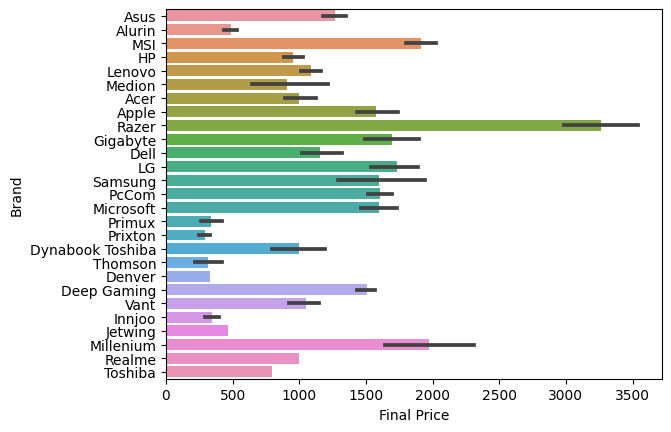

In [41]:
sns.barplot(x = 'Final Price', y = 'Brand', data = df_laptop)

plt.show()

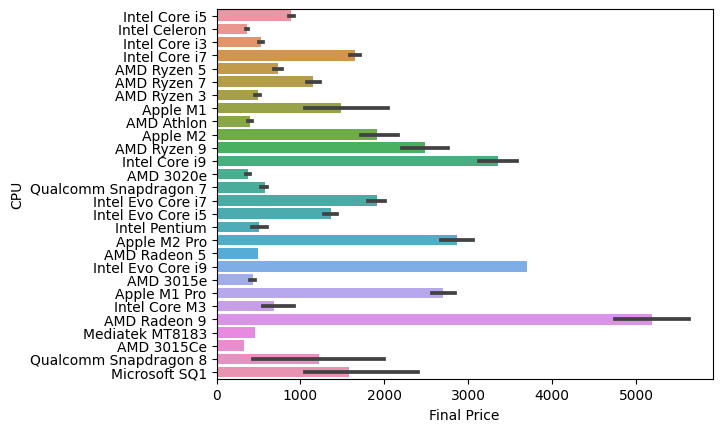

In [42]:
sns.barplot(x = 'Final Price', y = 'CPU', data = df_laptop)

plt.show()

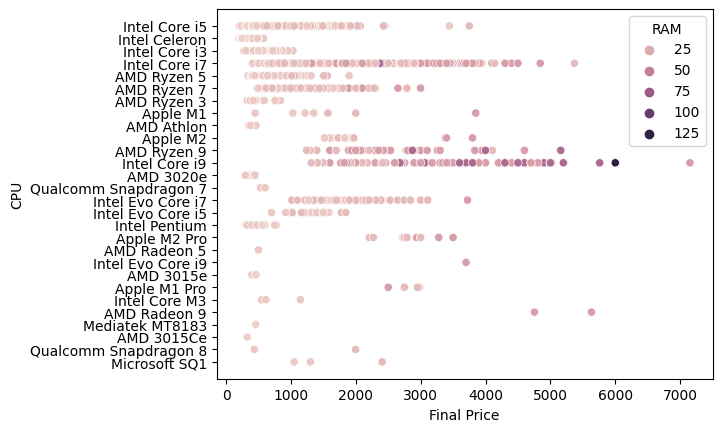

In [43]:
sns.scatterplot(x = 'Final Price', y = 'CPU', hue = 'RAM', data = df_laptop)

plt.show()

In [44]:
df_laptop['RAM'].value_counts()

RAM
16     928
8      817
32     301
4       68
64      25
12      15
6        3
40       2
128      1
Name: count, dtype: int64

In [45]:
df_laptop.loc[df_laptop['Touch'] == 'Yes']

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
143,ASUS Chromebook CX1400FKA-EC0078 Intel Celeron...,New,Asus,Chromebook,Intel Celeron,8,64,eMMC,NaN,14.0,Yes,449.00
154,Lenovo IdeaPad Flex 5 14ALC05 AMD Ryzen 5 5500...,New,Lenovo,IdeaPad,AMD Ryzen 5,16,512,SSD,NaN,14.0,Yes,799.00
176,Lenovo Ideapad Duet 5 Chromebook Qualcomm Snap...,New,Lenovo,IdeaPad,Qualcomm Snapdragon 7,8,128,eMMC,NaN,13.3,Yes,599.00
191,ASUS Chromebook Vibe CX55 Flip CX5501FEA-NA027...,New,Asus,Chromebook,Intel Core i3,8,256,SSD,NaN,15.6,Yes,699.00
211,ASUS Chromebook Vibe CX34 Flip CX3401FBA-N9003...,New,Asus,Chromebook,Intel Core i5,8,256,SSD,NaN,14.0,Yes,899.00
...,...,...,...,...,...,...,...,...,...,...,...,...
2126,MSI Summit E15 A11SCST-448ES Intel Core i7-118...,Refurbished,MSI,Summit,Intel Core i7,32,1000,SSD,GTX 1650,15.6,Yes,1320.09
2137,Microsoft Surface Pro X Microsoft SQ1/8 GB/128...,Refurbished,Microsoft,Surface Pro,Microsoft SQ1,8,128,SSD,NaN,13.0,Yes,1049.00
2138,Microsoft Surface Pro X Microsoft SQ1/8 GB/256...,Refurbished,Microsoft,Surface Pro,Microsoft SQ1,8,256,SSD,NaN,13.0,Yes,1299.00
2158,Razer Book 13 Intel Evo Core i7-1165G7/16GB/1T...,Refurbished,Razer,Book,Intel Evo Core i7,16,1000,SSD,NaN,13.4,Yes,1899.99


In [46]:
df_laptop.loc[df_laptop['RAM'] == 128]

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
478,MSI Titan GT77 HX 13VI-006ES Intel Core i9-139...,New,MSI,Titan,Intel Core i9,128,2000,SSD,RTX 4090,17.3,No,5999.0


<Axes: xlabel='Storage type', ylabel='Final Price'>

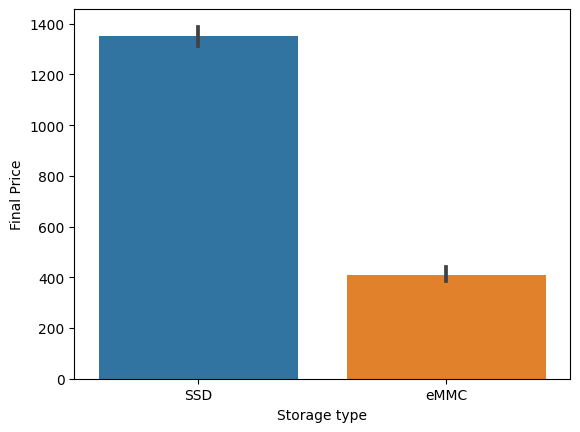

In [47]:
sns.barplot(x = 'Storage type', y = 'Final Price', data = df_laptop)

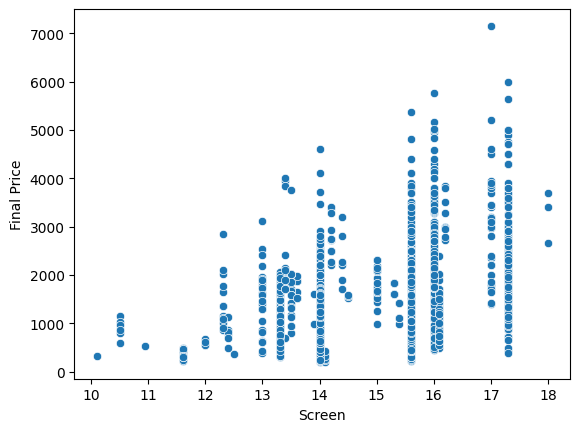

In [48]:
sns.scatterplot(x = 'Screen', y = 'Final Price', data = df_laptop)

plt.show()

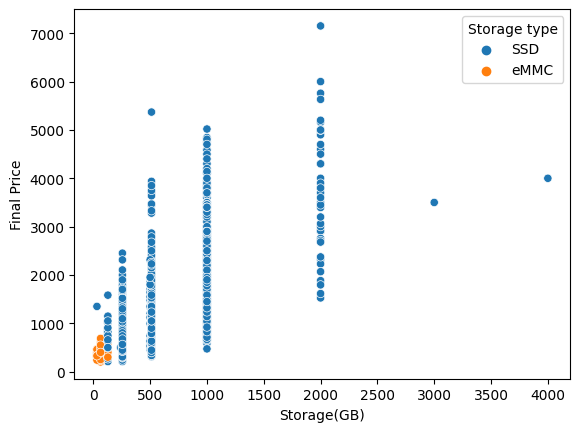

In [49]:
sns.scatterplot(x = 'Storage', y = 'Final Price', hue="Storage type", data = df_laptop)

plt.xlabel('Storage(GB)')
plt.show()

In [50]:
df_laptop.groupby(['Brand'], as_index=False)['Final Price'].mean()

,Brand,Final Price
0,Acer,1001.285766
1,Alurin,484.701379
2,Apple,1578.227672
3,Asus,1269.380699
4,Deep Gaming,1505.377500
5,Dell,1153.839881
6,Denver,329.950000
7,Dynabook Toshiba,999.197895
8,Gigabyte,1698.488958
9,HP,952.628478


In [51]:
df_laptop.groupby(['RAM'], as_index=False)['Final Price'].mean()

,RAM,Final Price
0,4,376.073382
1,6,377.336667
2,8,735.515361
3,12,650.162667
4,16,1427.919073
5,32,2558.194219
6,40,1217.010000
7,64,3774.692400
8,128,5999.000000


In [52]:
df_laptop.groupby(['Touch'], as_index=False)['Final Price'].mean()

,Touch,Final Price
0,No,1264.320574
1,Yes,1724.085947


In [53]:
df_laptop.groupby(['Storage'], as_index=False)['Final Price'].mean()

,Storage,Final Price
0,0,368.700000
1,32,410.749286
2,64,390.059429
3,128,545.955970
4,240,499.000000
5,256,753.696644
6,500,1111.522703
7,512,1096.102869
8,1000,2107.264263
9,2000,3764.014048


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.


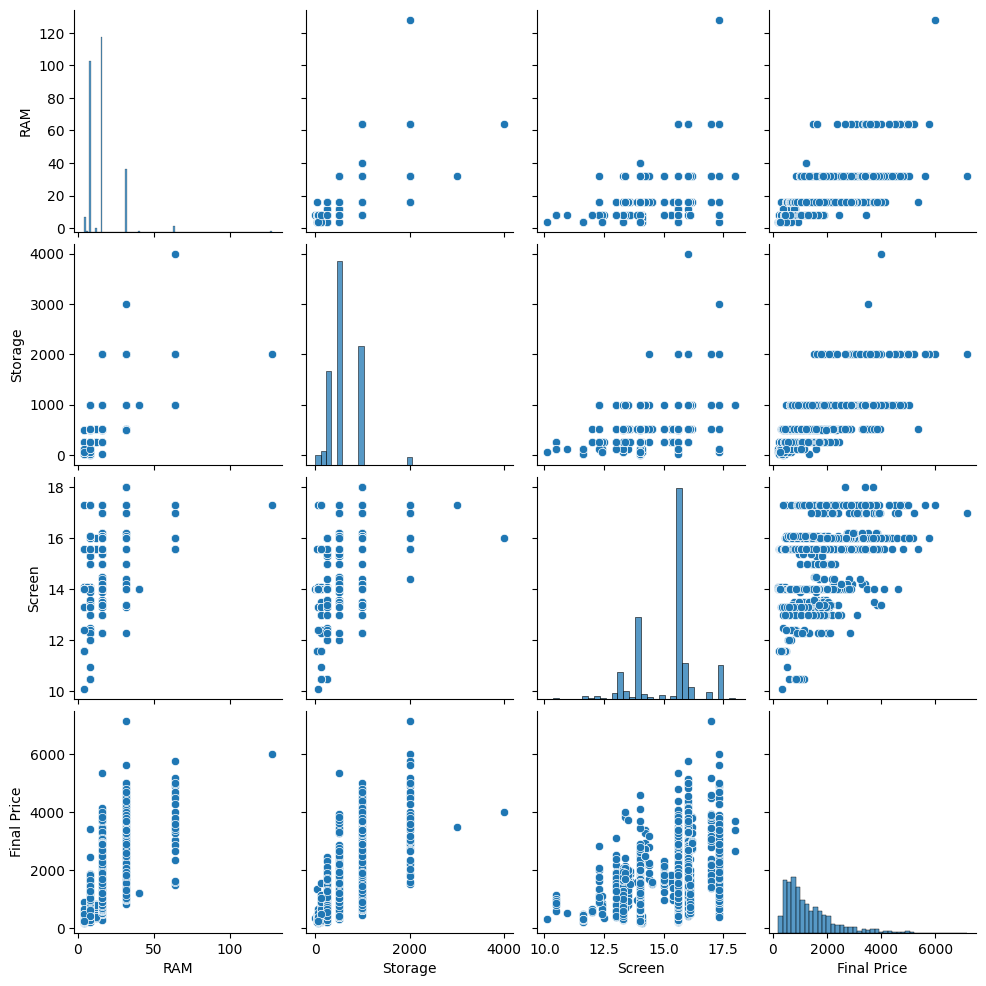

In [54]:
sns.pairplot(df_laptop)

## splitting data

---

In [55]:
x_train, x_test, y_train, y_test = train_test_split(df_laptop, 
                                                    df_laptop['Final Price'], test_size=0.2)

In [56]:
x_train.head()

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
1128,Acer Predator Helios 300 PH317-55-74GD Intel C...,Refurbished,Acer,Predator,Intel Core i7,16,1000,SSD,RTX 3060,17.3,No,1498.14
1412,HP 250 G7 Intel Core i5-1035G1/8 GB/256GB SSD/...,New,HP,250,Intel Core i5,8,256,SSD,NaN,15.6,No,1730.38
998,Acer Nitro 5 AN517-54-9875 Intel Core i9-11900...,New,Acer,Nitro,Intel Core i9,16,512,SSD,RTX 3060,17.3,No,1495.69
1711,Acer Aspire 3 A315-59-56GV Intel Core i5-1235U...,New,Acer,Aspire,Intel Core i5,8,512,SSD,NaN,15.6,No,810.99
1893,HP EliteBook 850 G8 Intel Core i7-1165G7/16GB/...,Refurbished,HP,EliteBook,Intel Core i7,16,512,SSD,NaN,15.6,No,1889.25


In [57]:
x_train.describe()

,RAM,Storage,Screen,Final Price
count,1728.000000,1728.000000,1724.000000,1728.000000
mean,15.408565,596.814815,15.148376,1310.731719
std,10.121198,368.029307,1.206527,924.616767
min,4.000000,0.000000,10.100000,201.050000
25%,8.000000,256.000000,14.000000,654.735000
50%,16.000000,512.000000,15.600000,1016.000000
75%,16.000000,1000.000000,15.600000,1708.970000
max,128.000000,4000.000000,18.000000,7150.470000
